# Investment Assigment



## Business and Data Understanding
Spark Funds has two minor constraints for investments:

    > It wants to invest between 5 to 15 million USD per round of investment

    > It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

    > For your analysis, consider a country to be English speaking only if English is one of the official languages in that country


## Business objective: 
The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.
## Goals of data analysis: 
Your goals are divided into three sub-goals:
#### Investment type analysis: 
Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.
#### Country analysis: 
Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.
#### Sector analysis: 
Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.)

## Objects and Keys list

#### DataFrame Names:
    > df_countries - list of english speaking countries

### Importing Commong Libraries

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

## 1. Loading and Cleaning English Speaking Countries

### The English-speaking-country-list-raw-format needs following cleanup

    * Remove the [1] at Suffix
    * Convert Primary_language columns from YES & NO to 1 & 0 respectively

The clean dataset has been saved to <font color = blue>english_country.csv</font> file


In [365]:
eng_countries = pd.read_csv('./dataset/English-speaking-country-list-raw-format.csv')

In [366]:
eng_countries.shape

(106, 4)

In [367]:
eng_countries

,country,region,population,primary_language
0,Australia,Oceania,25795700,Yes
1,New Zealand[1],Oceania,4893830,Yes
2,United Kingdom,Europe,66040229,Yes
3,United States,North America,328239523,Yes
4,Antigua and Barbuda[2],Caribbean,85000,Yes
...,...,...,...,...
101,"Saint Helena, Ascension and Tristan da Cunha[4]",South Atlantic,5660,Yes
102,Christmas Island12[2],Australia,1508,Yes
103,Cocos (Keeling) Islands16[2],Australia,596,Yes
104,Macau[44],Asia,696100,Yes


In [368]:
eng_countries.country.str.rstrip('[1234567890]')

0                                          Australia
1                                        New Zealand
2                                     United Kingdom
3                                      United States
4                                Antigua and Barbuda
                           ...                      
101     Saint Helena, Ascension and Tristan da Cunha
102                                 Christmas Island
103                          Cocos (Keeling) Islands
104                                            Macau
105                                          Tokelau
Name: country, Length: 106, dtype: object

In [369]:
eng_countries.country = eng_countries.country.str.rstrip('[1234567890]')

In [370]:
eng_countries.primary_language.value_counts()

Yes                                                                                             48
No                                                                                              39
No (but official and educational)                                                                2
Yes (used as lingua franca)                                                                      2
Yes (along with Samoan)                                                                          1
Yes (except Quebec)                                                                              1
No (co-official with Spanish as the primary language)                                            1
No (used as lingua franca, mostly and widely spoken, educational, commerce, and government)      1
Yes (and official, educational and lingua franca in formal economy)                              1
No (used as lingua franca)                                                                       1
Yes (lingu

In [371]:
# prime_split = eng_countries.primary_language.str.split()

# prime_split[20][0]

# prime_split.apply(lambda x: True if x[0]=='Yes' else False )[20:30]

# eng_countries['primary_language'] = prime_split.apply(lambda x: True if x[0]=='Yes' else False )[20:30]

In [372]:
eng_countries.primary_language = eng_countries.primary_language.apply(lambda x : True if x.split()[0]=='Yes' else False)

In [373]:
eng_countries[20:40]

,country,region,population,primary_language
20,Ireland,Europe,4900000,True
21,Jamaica,Caribbean,2714000,True
22,Kenya,Africa,45010056,True
23,Kiribati,Oceania,95000,False
24,Lesotho,Africa,2008000,False
25,Liberia,Africa,3750000,True
26,Malawi,Africa,16407000,True
27,Malta,Europe,430000,False
28,Marshall Islands,Oceania,59000,False
29,Micronesia,Oceania,110000,True


In [374]:
eng_countries.to_csv('./dataset/english_country.csv')

In [375]:
df_countries = pd.read_csv('./dataset/english_country.csv')

In [376]:
df_countries.loc[0:40]

,Unnamed: 0,country,region,population,primary_language
0,0,Australia,Oceania,25795700,True
1,1,New Zealand,Oceania,4893830,True
2,2,United Kingdom,Europe,66040229,True
3,3,United States,North America,328239523,True
4,4,Antigua and Barbuda,Caribbean,85000,True
5,5,Bahamas,Caribbean,331000,True
6,6,Barbados,Caribbean,294000,True
7,7,Belize,Central America,288000,True
8,8,Botswana,Africa,1882000,True
9,9,Burundi,Africa,10114505,False


## 2. Companies & Rounds2


how many unique companies are present in rounds2?	<font color="red">90247</font>

How many unique companies are present in companies?	<font color="red">66368</font>                       
In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.	 <font color="red">permalink</font>                       
Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N	 <font color="red">Y</font>          
Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame? <font color="red">114909</font>          

 

In [377]:
companies = pd.read_csv('./dataset/companies.csv')
rounds2 = pd.read_csv('./dataset/rounds2.csv')

### Data cleaning

##### Changing company names to lower case

In [378]:
companies.permalink = companies.permalink.apply(lambda x : x.lower())

In [379]:
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x : x.lower())

In [380]:
rounds2.shape

(114949, 6)

In [381]:
rounds2.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [382]:
len(rounds2.company_permalink.unique())

66373

In [383]:
companies.shape

(66368, 10)

In [384]:
companies.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [385]:
len(companies.permalink.unique())

66368

In [386]:
len(companies.name.unique())

66100

In [387]:
len(companies.homepage_url.unique())

61192

In [388]:
companies.permalink.nunique()

66368

In [389]:
master_frame = rounds2.merge(companies, left_on='company_permalink', right_on='permalink')

In [390]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114904,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,7000.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114905,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114906,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114907,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012


In [391]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83774
funded_at                      0
raised_amount_usd          19973
permalink                      0
name                           1
homepage_url                6130
category_list               3397
status                         0
country_code                8654
state_code                 10920
region                     10143
city                       10140
founded_at                 20502
dtype: int64

In [392]:
master_frame.shape

(114909, 16)

# Checkpoint 2: Funding Type Analysis


#### 1. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)

angel               400000.0 <br>
private_equity    20000000.0 <br>
seed                275000.0 <br>
venture            5000000.0 <br>

#### Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

venture            5000000.0 <br>


In [394]:
master_frame.funding_round_type.value_counts()

venture                  55487
seed                     30504
debt_financing            6895
angel                     6092
undisclosed               4894
equity_crowdfunding       3255
private_equity            2285
grant                     2196
convertible_note          1815
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [397]:
master_frame_original = master_frame
master_frame = master_frame[master_frame.funding_round_type.isin(['venture','seed','angel','private_equity'])]

In [398]:
master_frame.funding_round_type.value_counts()

venture           55487
seed              30504
angel              6092
private_equity     2285
Name: funding_round_type, dtype: int64

In [399]:
master_frame.groupby(by='funding_round_type')['raised_amount_usd'].median()

funding_round_type
angel              400000.0
private_equity   20000000.0
seed               275000.0
venture           5000000.0
Name: raised_amount_usd, dtype: float64

In [120]:
master_frame.groupby(by='funding_round_type')['raised_amount_usd'].mean()

funding_round_type
venture   11756660.1
Name: raised_amount_usd, dtype: float64

In [34]:
master_frame = master_frame[master_frame.funding_round_type.isin(['venture'])]

In [35]:
master_frame.funding_round_type.unique()

array(['venture'], dtype=object)

# Checkpoints - Part 2

## Checkpoint 3: Country Analysis


Analysing the Top 3 English-Speaking Countries

 1. Top English-speaking country	          - USA -     United States
 2. Second English-speaking country	 - GBR - United Kingdom
 3. Third English-speaking country	 - IND - INDIA


In [36]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114893,/organization/zyraz-technology,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.0,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994
114896,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN
114898,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN
114899,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.0,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007


In [37]:
country_total_investment = master_frame.groupby(by='country_code')['raised_amount_usd'].sum()

In [38]:
top9 = country_total_investment.sort_values(ascending=False)[0:9]

In [400]:
top9

country_code
USA   422510842796.0
CHN    39835418773.0
GBR    20245627416.0
IND    14391858718.0
CAN     9583332317.0
FRA     7259536732.0
ISR     6907514579.0
DEU     6346959822.0
JPN     3363676611.0
Name: raised_amount_usd, dtype: float64

# Checkpoint 4: Sector Analysis 1

In [40]:
sector = pd.read_csv('./dataset/mapping.csv')

In [41]:
sector

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [42]:
sector.category_list.nunique()

687

In [43]:
master_frame.category_list.nunique()

11632

In [44]:
sector[sector.category_list == 'Software']

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
620,Software,0,0,0,0,0,0,0,1,0


In [45]:
"Harish|Kumar".split("|")[0]

'Harish'

In [46]:
master_frame['category_list_final'] = master_frame.category_list.apply(lambda x : x.split("|")[0] if isinstance(x, str) else x) 

In [47]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         24507
funded_at                      0
raised_amount_usd           5261
permalink                      0
name                           0
homepage_url                2945
category_list               1128
status                         0
country_code                2869
state_code                  3789
region                      3548
city                        3548
founded_at                 11189
category_list_final         1128
dtype: int64

In [48]:
master_frame.category_list_final.isna()

0         False
1         False
3         False
4         False
5         False
          ...  
114893    False
114896    False
114898    False
114899    False
114903    False
Name: category_list_final, Length: 55487, dtype: bool

In [49]:
master_frame[master_frame.category_list_final.map(type) != str]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,category_list_final
99,/organization/123feng-com,/funding-round/9d83084d87dc63a309c9a6fe9bf59d1b,venture,A,27-10-2015,13000000.0,/organization/123feng-com,123Feng.Com,http://123feng.com/,NaN,operating,CHN,2,Hangzhou,Hangzhou,01-01-2014,NaN
133,/organization/17-media,/funding-round/f8ffde9fa822843ac6ea9b66cc615df1,venture,A,05-11-2015,10000000.0,/organization/17-media,17 Media,http://17.media,NaN,operating,NaN,NaN,NaN,NaN,15-07-2015,NaN
181,/organization/1mxians,/funding-round/6950448f81c6706abe61f659e15a7c87,venture,A,02-12-2015,15000000.0,/organization/1mxians,1mxians,http://www.1mxian.com/,NaN,operating,CHN,22,Beijing,Beijing,01-01-2014,NaN
268,/organization/24fab,/funding-round/e67f480303e9ad9aa4dffce1ea87a1b8,venture,NaN,20-07-2015,NaN,/organization/24fab,24fab,https://www.24fab.com/,NaN,operating,ESP,29,Madrid,Madrid,NaN,NaN
269,/organization/24fab,/funding-round/f7667e10f2d6381f4886fdbde2dbcbfb,venture,NaN,11-09-2014,NaN,/organization/24fab,24fab,https://www.24fab.com/,NaN,operating,ESP,29,Madrid,Madrid,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114292,/organization/zip-trade-technologies,/funding-round/74b8565f7f28bf31ffcb62626d658654,venture,D,08-11-2007,20000000.0,/organization/zip-trade-technologies,Zip Trade Technologies,NaN,NaN,closed,NaN,NaN,NaN,NaN,NaN,NaN
114412,/organization/zkey-com,/funding-round/aca95e6dda1b354ebee80bca5f261607,venture,B,22-11-1999,10000000.0,/organization/zkey-com,Zkey.com,http://zkey.com/,NaN,closed,NaN,NaN,NaN,NaN,NaN,NaN
114415,/organization/zlango,/funding-round/203baf1c533923de0bc50699a12f447e,venture,A,12-02-2007,12000000.0,/organization/zlango,Zlango,http://www.zlango.com,NaN,closed,NaN,NaN,NaN,NaN,NaN,NaN
114420,/organization/zlote-mysli,/funding-round/0787484a3d22104c752fe8a96d57abe4,venture,A,01-01-2009,NaN,/organization/zlote-mysli,Zlote Mysli,http://www.zlotemysli.pl/,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
sector.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [51]:
sector.fillna('')

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [52]:
sector

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [53]:
sector.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [54]:
sector['binary_cod'] = sector["Automotive & Sports"].map(str) + sector["Blanks"].map(str) + sector["Cleantech / Semiconductors"].map(str) + sector["Entertainment"].map(str) + sector["Health"].map(str)+ sector["Manufacturing"].map(str)+ sector["News, Search and Messaging"].map(str)+ sector["Others"].map(str)+sector["Social, Finance, Analytics, Advertising"].map(str)
# + " " + sector.iloc[:,2:3]
# sector.info()

In [55]:
map_dict = {
    "100000000" : "Automotive & Sports",
    "010000000" : "Blanks",
    "001000000" : "Cleantech / Semiconductors",
    "000100000" : "Entertainment",
    "000010000" : "Health",
    "000001000" : "Manufacturing",
    "000000100" : "News, Search and Messaging",
    "000000010" : "Others",
    "000000001" : "Social, Finance, Analytics, Advertising"
}

In [56]:
map_dict

{'100000000': 'Automotive & Sports',
 '010000000': 'Blanks',
 '001000000': 'Cleantech / Semiconductors',
 '000100000': 'Entertainment',
 '000010000': 'Health',
 '000001000': 'Manufacturing',
 '000000100': 'News, Search and Messaging',
 '000000010': 'Others',
 '000000001': 'Social, Finance, Analytics, Advertising'}

In [57]:
sector['sector'] = sector.binary_cod.apply(lambda x : map_dict[x])

In [58]:
map_dict['100000000']

'Automotive & Sports'

In [59]:
sector.sector

0                                       Blanks
1                                Manufacturing
2                                Manufacturing
3                                Manufacturing
4      Social, Finance, Analytics, Advertising
                        ...                   
683                                     Others
684                              Entertainment
685                              Entertainment
686                                     Others
687                                     Others
Name: sector, Length: 688, dtype: object

In [60]:
sector_melt = sector.melt(id_vars=['category_list'], value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])

In [61]:
sector_melt

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
...,...,...,...
6187,Wholesale,"Social, Finance, Analytics, Advertising",0
6188,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6189,Wireless,"Social, Finance, Analytics, Advertising",0
6190,Women,"Social, Finance, Analytics, Advertising",0


In [62]:
sector_melt = sector_melt[sector_melt.value == 1]

In [63]:
sector_melt = sector_melt[["category_list","variable"]]

In [64]:
sector_melt = sector_melt.rename(columns={"variable" : "main_sector"})

In [65]:
sector_melt

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [66]:
master_frame = master_frame.merge(sector_melt,left_on='category_list_final', right_on='category_list')

## Checkpoint 4 - Result - Master Frame with Main_sector

In [67]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,category_list_final,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51924,/organization/yapta,/funding-round/67e2a4f223ba195d75c516c02157e269,venture,NaN,29-12-2010,3500000.0,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,Tracking,Tracking,Others
51925,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,D,22-07-2013,4220000.0,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,Tracking,Tracking,Others
51926,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2000000.0,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,Tracking,Tracking,Others
51927,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1786563.0,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,Tracking,Tracking,Others


In [68]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         23157
funded_at                      0
raised_amount_usd           4906
permalink                      0
name                           0
homepage_url                2847
category_list_x             1128
status                         0
country_code                2759
state_code                  3627
region                      3421
city                        3421
founded_at                 10715
category_list_final         1128
category_list_y             1128
main_sector                    0
dtype: int64

In [69]:
master_frame.drop('category_list_y',axis=1,inplace=True)

In [70]:
master_frame = master_frame.rename(columns={"category_list_final" : "primary_sector"})

In [71]:
master_frame.country_code.unique()

array(['IND', 'GBR', 'USA', 'CHE', 'NLD', 'BEL', 'FRA', 'CHN', 'IDN',
       'FIN', 'ESP', 'TUR', 'ITA', 'SWE', nan, 'IRL', 'SGP', 'LBN', 'DEU',
       'HKG', 'ISR', 'PHL', 'ISL', 'NOR', 'ARG', 'CAN', 'CZE', 'JPN',
       'LUX', 'AUS', 'THA', 'KOR', 'BRA', 'MYS', 'SAU', 'SVK', 'RUS',
       'UKR', 'DNK', 'TWN', 'BHR', 'SVN', 'ARM', 'EGY', 'ARE', 'PAK',
       'ZAF', 'MEX', 'BMU', 'JOR', 'VNM', 'MKD', 'AUT', 'MLT', 'LVA',
       'GRC', 'ROM', 'POL', 'URY', 'NZL', 'MMR', 'PRT', 'EST', 'KWT',
       'KEN', 'MAF', 'BWA', 'HUN', 'PRI', 'KAZ', 'CYM', 'COL', 'CMR',
       'BAH', 'PAN', 'LIE', 'CHL', 'HRV', 'PER', 'NGA', 'BGD', 'MUS',
       'LTU', 'CRI', 'GHA', 'ECU', 'TAN', 'MOZ', 'CYP', 'BGR', 'MCO',
       'GTM', 'TTO', 'SEN', 'GGY', 'MAR', 'RWA', 'KNA', 'LAO', 'MNE',
       'UGA'], dtype=object)

# Checkpoint 5

## Result

In [72]:
pd.options.display.float_format = '{:.1f}'.format

In [73]:
D1 = master_frame[(master_frame.country_code =='USA') & master_frame.raised_amount_usd.between(5000000,15000000) ]
D2 = master_frame[(master_frame.country_code =='GBR') & master_frame.raised_amount_usd.between(5000000,15000000) ]
D3 = master_frame[(master_frame.country_code =='IND') & master_frame.raised_amount_usd.between(5000000,15000000) ]

# USA

### Find the sum of all Total "Invement Amount" and count of "number of Investments" by "Main_Sector"

In [74]:
D1.groupby(by='main_sector')['raised_amount_usd'].agg(['sum','count']).astype(str)

,sum,count
main_sector,,
Automotive & Sports,1454104361.0,167
Blanks,764763292.0,86
Cleantech / Semiconductors,21181003033.0,2297
Entertainment,5000212982.0,580
Health,8200859357.0,908
Manufacturing,7258553378.0,799
"News, Search and Messaging",13796816094.0,1563
Others,26089280296.0,2923
"Social, Finance, Analytics, Advertising",16680695048.0,1912


In [402]:
D1.pivot_table(index='main_sector', values='raised_amount_usd',aggfunc=[np.sum,'count']).sort_values(by=('count','raised_amount_usd'), ascending= False )

,sum,count
,raised_amount_usd,raised_amount_usd
main_sector,,
Others,26089280296.0,2923
Cleantech / Semiconductors,21181003033.0,2297
"Social, Finance, Analytics, Advertising",16680695048.0,1912
"News, Search and Messaging",13796816094.0,1563
Health,8200859357.0,908
Manufacturing,7258553378.0,799
Entertainment,5000212982.0,580
Automotive & Sports,1454104361.0,167


In [87]:
D1.pivot_table(index=['main_sector','company_permalink'],values='raised_amount_usd',aggfunc=[np.sum,'count'], margins=True)

sum  \
                                                                     raised_amount_usd   
main_sector                             company_permalink                                
Automotive & Sports                     /organization/3d-robotics           19000000.0   
                                        /organization/additech               6000000.0   
                                        /organization/agm-automotive        12500000.0   
                                        /organization/airbiquity            10419873.0   
                                        /organization/airware               12200000.0   
...                                                                                ...   
Social, Finance, Analytics, Advertising /organization/zuberance              8000000.0   
                                        /organization/zumigo                 6000000.0   
                                        /organization/zuora                 21500000.0   
                                        /organization/zynga                 36363786.0   
All                                                                     100426287841.0   

                                                                                 count  
                                                                     raised_amount_usd  
main_sector                             company_permalink                               
Automotive & Sports                     /organization/3d-robotics                    2  
                                        /organization/additech                       1  
                                        /organization/agm-automotive                 1  
                                        /organization/airbiquity                     1  
                                        /organization/airware                        1  
...                                                                                ...  
Social, Finance, Analytics, Advertising /organization/zuberance                      1  
                                        /organization/zumigo                         1  
                                        /organization/zuora                          2  
                                        /organization/zynga                          4  
All                                                                              11235  

[7857 rows x 2 columns]

In [ ]:
D1.pivot_table(index=['main_sector','company_permalink'],values='raised_amount_usd',aggfunc=[np.sum,'count'], margins=True)

In [83]:
D1_pvt = D1.pivot_table(index=['main_sector','company_permalink'],values='raised_amount_usd',aggfunc=[np.sum,'count'], margins=True)

In [88]:
D1_pvt.columns

MultiIndex([(  'sum', 'raised_amount_usd'),
            ('count', 'raised_amount_usd')],
           )

In [114]:
D1_pvt.loc[['Others','Cleantech / Semiconductors']].sort_values(by =('sum', 'raised_amount_usd'), ascending= False).groupby(by='main_sector').head(1)

,,sum,count
,,raised_amount_usd,raised_amount_usd
main_sector,company_permalink,,
Cleantech / Semiconductors,/organization/biodesix,75300000.0,8
Others,/organization/virtustream,64300000.0,6


In [108]:
D1_pvt.loc[['Others']].sort_values(by =('sum', 'raised_amount_usd'), ascending= False)

sum  \
                                                raised_amount_usd   
main_sector company_permalink                                       
Others      /organization/virtustream                  64300000.0   
            /organization/capella                      54968051.0   
            /organization/airtight-networks            54201907.0   
            /organization/decarta                      52100000.0   
            /organization/black-duck-software          51000000.0   
...                                                           ...   
            /organization/g2-switchworks                5000000.0   
            /organization/quiet-logistics               5000000.0   
            /organization/qualaroo                      5000000.0   
            /organization/unav-microelectronics         5000000.0   
            /organization/urbanbound                    5000000.0   

                                                            count  
                                                raised_amount_usd  
main_sector company_permalink                                      
Others      /organization/virtustream                           6  
            /organization/capella                               6  
            /organization/airtight-networks                     5  
            /organization/decarta                               5  
            /organization/black-duck-software                   6  
...                                                           ...  
            /organization/g2-switchworks                        1  
            /organization/quiet-logistics                       1  
            /organization/qualaroo                              1  
            /organization/unav-microelectronics                 1  
            /organization/urbanbound                            1  

[2030 rows x 2 columns]

In [110]:
D1_pvt.loc[['Cleantech / Semiconductors']].sort_values(by =('sum', 'raised_amount_usd'), ascending= False).head(5)

sum  \
                                                       raised_amount_usd   
main_sector                company_permalink                               
Cleantech / Semiconductors /organization/biodesix             75300000.0   
                           /organization/tigo-energy          68739496.0   
                           /organization/forsight-labs        61300001.0   
                           /organization/rheonix              56124758.0   
                           /organization/scienergy            55375423.0   

                                                                   count  
                                                       raised_amount_usd  
main_sector                company_permalink                              
Cleantech / Semiconductors /organization/biodesix                      8  
                           /organization/tigo-energy                   8  
                           /organization/forsight-labs                 7  
                           /organization/rheonix                       5  
                           /organization/scienergy                     6

In [105]:
D1.groupby(by=['main_sector','company_permalink'])['raised_amount_usd'].agg(['sum','count']).astype(str)

sum  \
main_sector                             company_permalink                          
Automotive & Sports                     /organization/3d-robotics     19000000.0   
                                        /organization/additech         6000000.0   
                                        /organization/agm-automotive  12500000.0   
                                        /organization/airbiquity      10419873.0   
                                        /organization/airware         12200000.0   
...                                                                          ...   
Social, Finance, Analytics, Advertising /organization/zoove           54800000.0   
                                        /organization/zuberance        8000000.0   
                                        /organization/zumigo           6000000.0   
                                        /organization/zuora           21500000.0   
                                        /organization/zynga           36363786.0   

                                                                     count  
main_sector                             company_permalink                   
Automotive & Sports                     /organization/3d-robotics        2  
                                        /organization/additech           1  
                                        /organization/agm-automotive     1  
                                        /organization/airbiquity         1  
                                        /organization/airware            1  
...                                                                    ...  
Social, Finance, Analytics, Advertising /organization/zoove              5  
                                        /organization/zuberance          1  
                                        /organization/zumigo             1  
                                        /organization/zuora              2  
                                        /organization/zynga              4  

[7856 rows x 2 columns]

In [76]:
D2.groupby(by='main_sector')['raised_amount_usd'].agg(['sum','count']).astype(str)

,sum,count
main_sector,,
Automotive & Sports,167051565.0,16
Blanks,57764848.0,7
Cleantech / Semiconductors,1136905008.0,127
Entertainment,461511059.0,54
Health,214537510.0,24
Manufacturing,361940335.0,42
"News, Search and Messaging",615746235.0,73
Others,1249124289.0,143
"Social, Finance, Analytics, Advertising",821888357.0,98


In [77]:
D2.pivot_table(index='main_sector', values='raised_amount_usd',aggfunc=[np.sum,'count'], margins=True)

,sum,count
,raised_amount_usd,raised_amount_usd
main_sector,,
Automotive & Sports,167051565.0,16
Blanks,57764848.0,7
Cleantech / Semiconductors,1136905008.0,127
Entertainment,461511059.0,54
Health,214537510.0,24
Manufacturing,361940335.0,42
"News, Search and Messaging",615746235.0,73
Others,1249124289.0,143


In [403]:
D2.pivot_table(index='main_sector', values='raised_amount_usd',aggfunc=[np.sum,'count']).sort_values(by=('count','raised_amount_usd'), ascending= False )

,sum,count
,raised_amount_usd,raised_amount_usd
main_sector,,
Others,1249124289.0,143
Cleantech / Semiconductors,1136905008.0,127
"Social, Finance, Analytics, Advertising",821888357.0,98
"News, Search and Messaging",615746235.0,73
Entertainment,461511059.0,54
Manufacturing,361940335.0,42
Health,214537510.0,24
Automotive & Sports,167051565.0,16


In [115]:
D2_pvt = D2.pivot_table(index=['main_sector','company_permalink'],values='raised_amount_usd',aggfunc=[np.sum,'count'], margins=True)

In [116]:
D2_pvt.loc[['Others','Cleantech / Semiconductors']].sort_values(by =('sum', 'raised_amount_usd'), ascending= False).groupby(by='main_sector').head(1)

,,sum,count
,,raised_amount_usd,raised_amount_usd
main_sector,company_permalink,,
Others,/organization/electric-cloud,37000000.0,4
Cleantech / Semiconductors,/organization/eusa-pharma,35600000.0,3


In [78]:
D3.groupby(by='main_sector')['raised_amount_usd'].agg(['sum','count']).astype(str)

,sum,count
main_sector,,
Automotive & Sports,136900000.0,13
Blanks,27000000.0,2
Cleantech / Semiconductors,165380000.0,20
Entertainment,280830000.0,33
Health,167740000.0,19
Manufacturing,200900000.0,21
"News, Search and Messaging",433834545.0,52
Others,1007409507.0,109
"Social, Finance, Analytics, Advertising",290543500.0,32


In [404]:
D3.pivot_table(index='main_sector', values='raised_amount_usd',aggfunc=[np.sum,'count']).sort_values(by=('count','raised_amount_usd'), ascending= False )

,sum,count
,raised_amount_usd,raised_amount_usd
main_sector,,
Others,1007409507.0,109
"News, Search and Messaging",433834545.0,52
Entertainment,280830000.0,33
"Social, Finance, Analytics, Advertising",290543500.0,32
Manufacturing,200900000.0,21
Cleantech / Semiconductors,165380000.0,20
Health,167740000.0,19
Automotive & Sports,136900000.0,13


In [79]:
D3.pivot_table(index='main_sector', values='raised_amount_usd',aggfunc=[np.sum,'count'], margins=True)

,sum,count
,raised_amount_usd,raised_amount_usd
main_sector,,
Automotive & Sports,136900000.0,13
Blanks,27000000.0,2
Cleantech / Semiconductors,165380000.0,20
Entertainment,280830000.0,33
Health,167740000.0,19
Manufacturing,200900000.0,21
"News, Search and Messaging",433834545.0,52
Others,1007409507.0,109


In [117]:
D3_pvt = D3.pivot_table(index=['main_sector','company_permalink'],values='raised_amount_usd',aggfunc=[np.sum,'count'], margins=True)
D3_pvt.loc[['Others','News, Search and Messaging']].sort_values(by =('sum', 'raised_amount_usd'), ascending= False).groupby(by='main_sector').head(1)

,,sum,count
,,raised_amount_usd,raised_amount_usd
main_sector,company_permalink,,
Others,/organization/firstcry-com,39000000.0,3
"News, Search and Messaging",/organization/gupshup-technology-india-pvt-ltd,33000000.0,3


# Checkpoint 6

## PLOT 1

#### A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.  

In [206]:
cp6_1 = master_frame_original.groupby(by='funding_round_type')['raised_amount_usd'].median()

In [213]:
cp6_1_values = cp6_1.values//100000

In [214]:
cp6_1_values

array([  4.,   2.,  11.,   1.,   2.,   0., 199., 122., 200.,   1., 326.,
         2.,  10.,  50.])

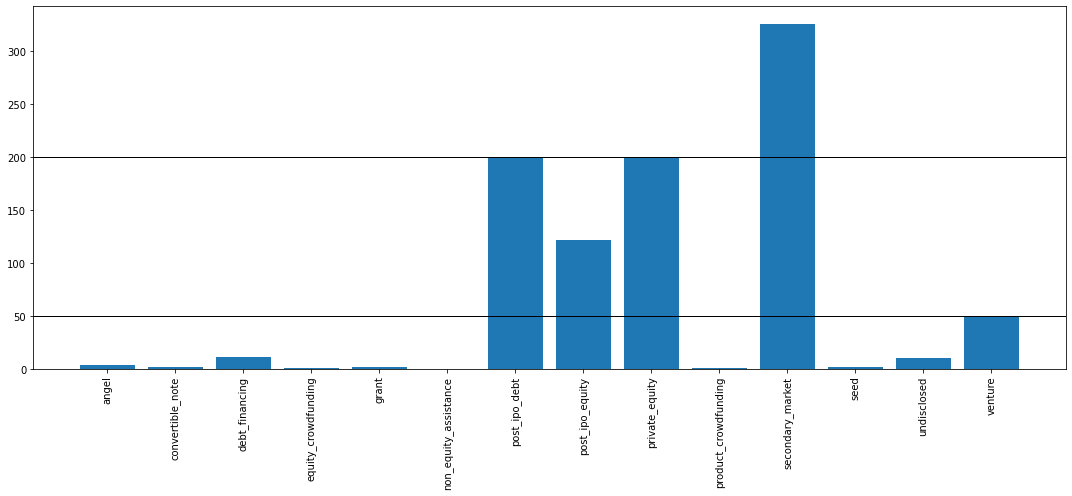

In [245]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.bar(cp6_1.index, cp6_1_values)
plt.xticks(rotation='vertical')

threshold = 50
plt.axhline(y=threshold,linewidth=1, color='k')
plt.axhline(y=200,linewidth=1, color='k')
# Another example - You can also define xmin and xmax
# plt.axhline(y=5, xmin=50, xmax=200)

plt.show()

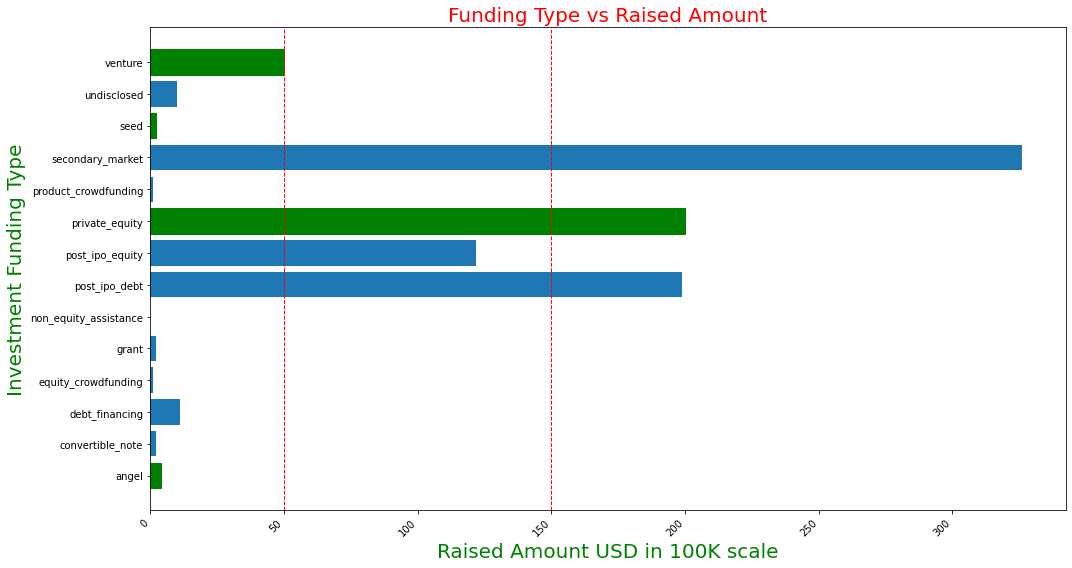

In [412]:
fig, ax = plt.subplots(figsize=(15, 8))
barlist = ax.barh(cp6_1.index, cp6_1_values)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
# plt.xlim(-10,300,10)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
# plt.plot([50, 150], [5, 5], lw=10, color="orange", solid_capstyle="butt")

barlist[13].set_color('g')
barlist[11].set_color('g')
barlist[8].set_color('g')
barlist[0].set_color('g')

plt.axvline(x=threshold,linewidth=1, color='r',linestyle = '--')
plt.axvline(x=150,linewidth=1, color='r', linestyle = '--')
plt.xlabel('Raised Amount USD in 100K scale',fontsize =20,color='Green')
plt.ylabel('Investment Funding Type',fontsize =20,color='Green')
plt.title('Funding Type vs Raised Amount',fontsize =20, color= 'Red')

plt.show()



## PLOT 2 - 

 

#### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.                                                                                                                                                                             

In [254]:
top9

country_code
USA   422510842796.0
CHN    39835418773.0
GBR    20245627416.0
IND    14391858718.0
CAN     9583332317.0
FRA     7259536732.0
ISR     6907514579.0
DEU     6346959822.0
JPN     3363676611.0
Name: raised_amount_usd, dtype: float64

In [261]:
top9_values = top9.values//1000000000

In [291]:
x_english_lable = ['ENG','Others','ENG','ENG','ENG','Others','Others','ENG','Others']

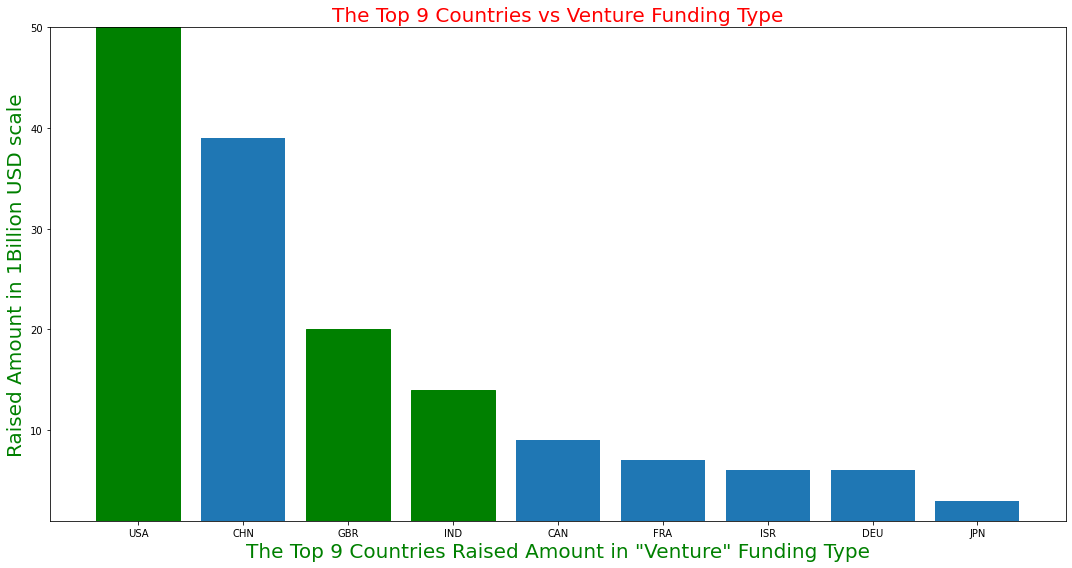

In [294]:
fig, ax = plt.subplots(figsize=(15, 8))
barlist = plt.bar(top9.index, top9_values)
plt.ylim(1,50,1)

barlist[0].set_color('g')
barlist[2].set_color('g')
Fu

plt.ylabel('Raised Amount in 1Billion USD scale',fontsize =20,color='Green')
plt.xlabel('The Top 9 Countries Raised Amount in "Venture" Funding Type',fontsize =20,color='Green')
plt.title('The Top 9 Countries vs Venture Funding Type',fontsize =20, color= 'Red')

plt.show()

## PLOT-3

#### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [312]:
D1_plot =  D1.groupby(by='main_sector')['raised_amount_usd'].agg(['sum','count']).sort_values(by='count', ascending = False ).head(3)

D2_plot = D2.groupby(by='main_sector')['raised_amount_usd'].agg(['sum','count']).sort_values(by='count', ascending = False ).head(3)

D3_plot = D3.groupby(by='main_sector')['raised_amount_usd'].agg(['sum','count']).sort_values(by='count', ascending = False ).head(3)

In [336]:
D3_plot.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of                                     sum  count
main_sector                                   
Others                     1007409507.0    109
News, Search and Messaging  433834545.0     52
Entertainment               280830000.0     33>

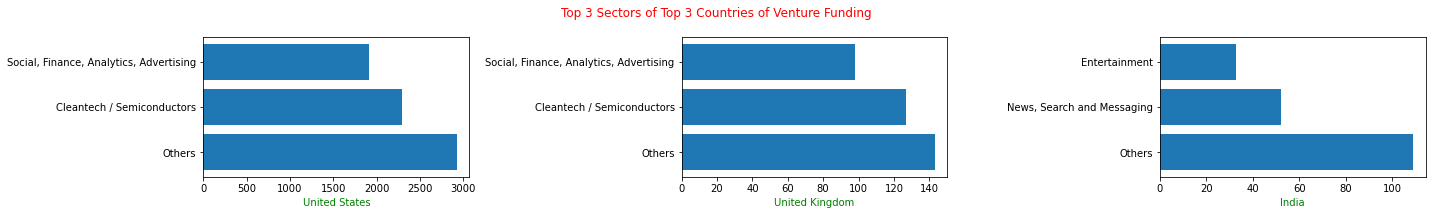

In [363]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 3))
ax1.barh(D1_plot.index, D1_plot['count'])
ax2.barh(D2_plot.index, D2_plot['count'])
ax3.barh(D3_plot.index, D3_plot['count'])
fig.suptitle('Top 3 Sectors of Top 3 Countries of Venture Funding', color ='r')

ax1.set_xlabel('United States', color ='g')
ax2.set_xlabel('United Kingdom', color ='g')
ax3.set_xlabel('India', color ='g')

plt.show()